### Spam Or Ham Classification 

Build a classification model for the default of youTube spam or ham dataset. More info here:
https://archive.ics.uci.edu/ml/datasets/YouTube+Spam+Collection

- Study the ROC Curve & accuracy Score

In [1]:
import numpy as np
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## Explore the data

In [2]:
path = r"C:\Users\Nafiseh\ML_projects\YouTube-Spam-Collection-v1"
files_name = ['\\Youtube01-Psy.csv' , '\\Youtube02-KatyPerry.csv' ,
              '\\Youtube03-LMFAO.csv', '\\Youtube04-Eminem.csv', '\\Youtube05-Shakira.csv']
dfs = []
for file in files_name:
    df = pd.read_csv(path + file , header = 0)
    dfs.append(df)

In [3]:
# union all the datasets:

df = pd.concat(dfs)

In [4]:
len(df)

1956

In [6]:
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 0 to 369
Data columns (total 5 columns):
COMMENT_ID    1956 non-null object
AUTHOR        1956 non-null object
DATE          1711 non-null object
CONTENT       1956 non-null object
CLASS         1956 non-null int64
dtypes: int64(1), object(4)
memory usage: 91.7+ KB


<pre>
For comments classification we need just need content and class columns.</pre>

In [8]:
# new dataframe with relative cloumns
df = df[["CONTENT", "CLASS"]]

In [9]:
df.shape

(1956, 2)

In [10]:
df["CLASS"].value_counts()

1    1005
0     951
Name: CLASS, dtype: int64

## Prepare the data for ML algorithms

In [11]:
import re
import nltk
#nltk.download()

In [12]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


In [13]:
stop_words = set(stopwords.words("english"))
ps = PorterStemmer()

In [14]:
corpus = []
for i in range(len(df)):
    comment = re.sub(r'[^a-zA-Z0-9]', ' ',df.iloc[i,0])
    comment = comment.lower()
    #comment = comment.split() #list of words
    comment =word_tokenize(comment)

    comment = [ps.stem(w) for w in comment if not w in stop_words]
    comment = ' '.join(comment)
    corpus.append(comment)

corpus

['huh anyway check tube channel kobyoshi02',
 'hey guy check new channel first vid us monkey monkey white shirt pleas leav like comment pleas subscrib',
 'test say murdev com',
 'shake sexi ass channel enjoy',
 'watch v vtarggvgtwq check',
 'hey check new websit site kid stuff kidsmediausa com',
 'subscrib channel',
 'turn mute soon came want check view',
 'check channel funni video',
 'u check channel tell next',
 'hey subscrib',
 'start read stop subscrib within one day entir famili die want stay aliv subscrib right',
 'http twitter com gbphotographygb',
 'subscrib like comment',
 'pleas like http premium easypromosapp com votem 19924 616375350',
 'hello like game art video scientif experi tutori lyric video much much pleas check channel subscrib start soon hope abl cover expect also check got far',
 'check view',
 'http www ebay com itm 171183229277 sspagenam strk meselx amp trksid p3984 m1555 l2649',
 'http ubuntuon com 40beuutvu2zkxk4utgpz8k',
 'edm apparel compani dedic bring mus

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray() #bag of the words

y = df.iloc[:, 1].values

----

## Create the train & test set

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [52]:
for df in [X_train, X_test, y_train, y_test]:
    print(df.shape)

(1564, 3772)
(392, 3772)
(1564,)
(392,)


-----

## Train different models (Binary Classifier)

- Model evaluation Metric: AUC ROC Curve & accuracy Score

### 0. Naive Bayes

In [17]:
from sklearn.naive_bayes import MultinomialNB #because there is a lot of 0 ,1 
clf_nb = MultinomialNB()
clf_nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [18]:
y_pred_nb = clf_nb.predict(X_test)
y_proba_nb = clf_nb.predict_proba(X_test)

In [19]:
from sklearn.metrics import confusion_matrix , accuracy_score , roc_auc_score

y_scores_nb = y_proba_nb[:, 1]
auc_nb = roc_auc_score (y_test, y_scores_nb)
print("The AUC score for Naive Bayes is: ", auc_nb)


acc_nb = accuracy_score(y_test, y_pred_nb)
print("The Accuracy score for Naive Bayes is: ", acc_nb)

cm_nb = confusion_matrix(y_test, y_pred_nb)
print("The Confusion matrix for Naive Bayes is: \n" , cm_nb)

The AUC score for Naive Bayes is:  0.952179255889
The Accuracy score for Naive Bayes is:  0.915816326531
The Confusion matrix for Naive Bayes is: 
 [[166  17]
 [ 16 193]]


### 1. Logistic Regression

In [21]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = [{'penalty': ['l2','l1']}]

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv= 4,
                       scoring='roc_auc', n_jobs = -1)
grid_search.fit(X_train,y_train)
print ("best parameter: ", grid_search.best_params_)

best_model_log = grid_search.best_estimator_
print ("best_model: ", best_model_log)

best parameter:  {'penalty': 'l2'}
best_model:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [56]:
# Predicting the Test set results
y_pred_log = best_model_log.predict(X_test)
y_proba_log = best_model_log.predict_proba(X_test)

In [57]:
# Evaluate the Model
from sklearn.metrics import roc_auc_score , accuracy_score, confusion_matrix

y_scores_log = y_proba_log[:, 1]
auc_log = roc_auc_score (y_test, y_scores_log)
print("The AUC score for Logistic Regression is: ", auc_log)

acc_log = accuracy_score(y_test, y_pred_log)
print("The Accuracy score for Logistic Regression is: ", acc_log)

cm_log = confusion_matrix(y_test, y_pred_log)
print("The Confusion matrix for Logistic Regression is: \n" , cm_log)

The AUC score for Logistic Regression is:  0.98227311946
The Accuracy score for Logistic Regression is:  0.933673469388
The Confusion matrix for Logistic Regression is: 
 [[175   8]
 [ 18 191]]


### 2. K- Nearnest Neighbors

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_neighbors': [5, 10, 50, 100]}]

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv= 4,
                       scoring='roc_auc', n_jobs = -1)
grid_search.fit(X_train,y_train)
print ("best parameter: ", grid_search.best_params_)

best_model_knn = grid_search.best_estimator_
print ("best_model: ", best_model_knn)

best parameter:  {'n_neighbors': 10}
best_model:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')


In [40]:
# Predicting the Test set results
y_pred_knn = best_model_knn.predict(X_test)
y_proba_knn = best_model_knn.predict_proba(X_test)

In [41]:
# Evaluate the Model
y_scores_knn = y_proba_knn[:, 1]
auc_knn = roc_auc_score (y_test, y_scores_knn)
print("The AUC score for KNN is: ", auc_knn)

acc_knn = accuracy_score(y_test, y_pred_knn)
print("The Accuracy score for KNN is: ", acc_knn)

cm_knn = confusion_matrix(y_test, y_pred_knn)
print("The Confusion matrix for KNN is: \n" , cm_knn)

The AUC score for KNN is:  0.948113577535
The Accuracy score for KNN is:  0.821428571429
The Confusion matrix for KNN is: 
 [[178   5]
 [ 65 144]]


### 3. SVM

In [51]:
from sklearn.svm import SVC
param_grid = [{
        'kernel': ['linear', 'rbf'] ,
            'C': [ 0.1, 1, 10, 20]
            }]


grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid, cv= 4,
                                scoring='accuracy', n_jobs = -1)

grid_search_svm.fit(X_train,y_train)
print ("best parameter: ", grid_search_svm.best_params_)

best_model_svm = grid_search_svm.best_estimator_
print ("best_model: ", best_model_svm)

best parameter:  {'C': 1, 'kernel': 'linear'}
best_model:  SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)


In [50]:
# Predicting the Test set results
y_pred_svm = best_model_svm.predict(X_test_sc)

# Evaluate the Model
acc_svm = accuracy_score(y_test, y_pred_svm)
print("The Accuracy score for SVM is: ", acc_svm)

cm_svm = confusion_matrix(y_test, y_pred_svm)
print("The Confusion matrix for SVM is: \n" , cm_svm)

The Accuracy score for SVM is:  0.885204081633
The Confusion matrix for SVM is: 
 [[168  15]
 [ 30 179]]


### 4. Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

param_grid = [{'n_estimators': [50, 100, 200 , 300],
              'max_depth': [3, 7, 10 , 14] }]

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), 
                              param_grid, cv= 3,
                                scoring='roc_auc', n_jobs = -1)

grid_search_rf.fit(X_train,y_train)
print ("best parameter: ", grid_search_rf.best_params_)

best_model_rf = grid_search_rf.best_estimator_
print ("best_model: ", best_model_rf)

best parameter:  {'n_estimators': 300, 'max_depth': 14}
best_model:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)


In [47]:
# Predicting the Test set results
y_pred_rf = best_model_rf.predict(X_test)
y_proba_rf = best_model_rf.predict_proba(X_test)

In [48]:
# Evaluate the Model
y_scores_rf = y_proba_rf[:, 1]
auc_rf = roc_auc_score (y_test, y_scores_rf)
print("The AUC score for RandomForests is: ", auc_rf)

acc_rf = accuracy_score(y_test, y_pred_rf)
print("The Accuracy score for RandomForests is: ", acc_rf)

cm_rf = confusion_matrix(y_test, y_pred_rf)
print("The Confusion matrix for RandomForests is: \n" , cm_rf)

The AUC score for RandomForests is:  0.978364316156
The Accuracy score for RandomForests is:  0.915816326531
The Confusion matrix for RandomForests is: 
 [[181   2]
 [ 31 178]]


### ROC Curves & Compare models

In [49]:
from sklearn.metrics import roc_curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

In [61]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test,y_scores_rf)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test,y_scores_knn)
fpr_log, tpr_log, thresholds_log = roc_curve(y_test,y_scores_log)
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test,y_scores_nb)

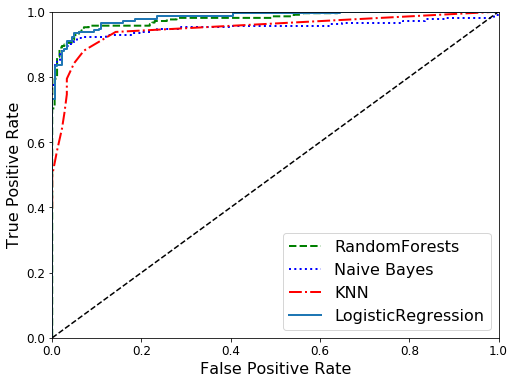

In [62]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, "g--", linewidth=2, label="RandomForests")
plt.plot(fpr_nb, tpr_nb, "b:", linewidth=2, label="Naive Bayes")
plt.plot(fpr_knn, tpr_knn, "r-.", linewidth=2, label="KNN")
plot_roc_curve(fpr_log, tpr_log, "LogisticRegression")
plt.legend(loc="lower right", fontsize=16)
plt.show()

### Compare Accuracy Rates

In [63]:
acc_scores = {"Model": ["Navie Bayes","Logistic Regression", "KNN", "SVM", "RandomForests"],
             "Accuracy Score": [acc_nb, acc_log , acc_knn, acc_svm, acc_rf]}

acc_df = pd.DataFrame(acc_scores)
acc_df = acc_df [["Model", "Accuracy Score"]]
acc_df

,Model,Accuracy Score
0,Navie Bayes,0.915816
1,Logistic Regression,0.933673
2,KNN,0.821429
3,SVM,0.931122
4,RandomForests,0.915816


### Visalization

In [5]:
spam = df.loc[df.CLASS == 1]
ham = df.loc[df.CLASS ==0]

In [9]:
spam.head()


,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [14]:
# it is better to do it after removing stop words

words_spam = ''
for i in range(len(spam)):
    words_spam = words_spam + spam.iloc[i , 3] + ' ' 

words_ham = ''
for i in range(len(ham)):
    words_ham = words_ham + ham.iloc[i , 3] + ' '

In [15]:
from wordcloud import WordCloud
# Generate a word cloud image
spam_wordcloud = WordCloud(width=400, height=200).generate(words_spam)
ham_wordcloud = WordCloud(width=400, height=200).generate(words_ham)

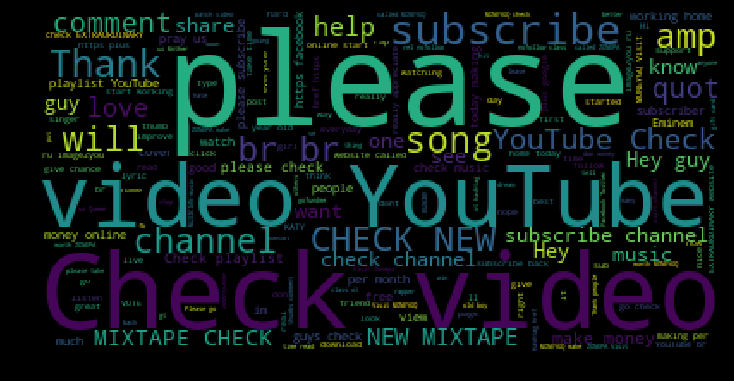

In [16]:
#Spam Word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

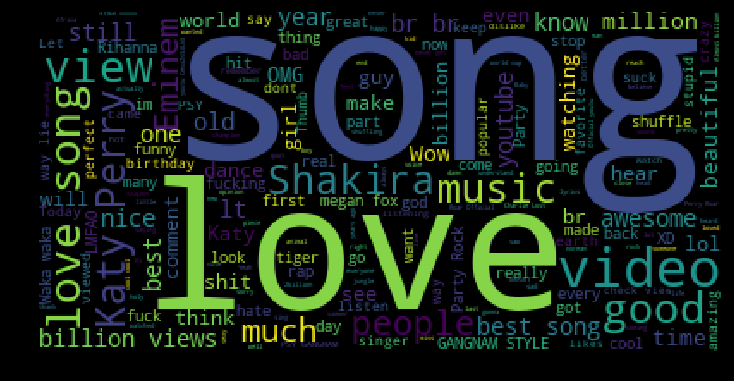

In [17]:
#Ham word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()